In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mplhep as hep

from collections import Counter
from jet_matching_functions import *

In [2]:
# set plot style
plt.style.use([hep.style.ATLAS,
                   {'font.sans-serif': ['Tex Gyre Heros']},  # use when helvetica isn't installed
                   {'errorbar.capsize': 5},
                   {'axes.labelsize': 23},
                   {'axes.labelpad': 23},
    ])


In [3]:
fname = 'DAODtoNTUPLE_10000_newest.root'
file = uproot.open(fname)

In [4]:
file['outTree;1']['nominal'].keys()

[b'runNumber',
 b'eventNumber',
 b'lumiBlock',
 b'coreFlags',
 b'bcid',
 b'mcEventNumber',
 b'mcChannelNumber',
 b'mcEventWeight',
 b'mcEventWeights',
 b'timeStamp',
 b'timeStampNSOffset',
 b'TileError',
 b'SCTError',
 b'LArError',
 b'TileFlags',
 b'SCTFlags',
 b'LArFlags',
 b'eventClean_LooseBad',
 b'NPV',
 b'actualInteractionsPerCrossing',
 b'averageInteractionsPerCrossing',
 b'weight_pileup',
 b'correctedAverageMu',
 b'correctedAndScaledAverageMu',
 b'correctedActualMu',
 b'correctedAndScaledActualMu',
 b'weight_pileup_up',
 b'weight_pileup_down',
 b'rand_run_nr',
 b'rand_lumiblock_nr',
 b'passL1',
 b'passHLT',
 b'passedTriggers',
 b'disabledTriggers',
 b'na4_pflowjets_raw',
 b'a4_pflowjets_raw_E',
 b'a4_pflowjets_raw_pt',
 b'a4_pflowjets_raw_phi',
 b'a4_pflowjets_raw_eta',
 b'a4_pflowjets_raw_clean_passLooseBad',
 b'a4_pflowjets_raw_clean_passTightBad',
 b'a4_pflowjets_raw_numConstituents',
 b'a4_pflowjets_raw_ConeTruthLabelID',
 b'a4_pflowjets_raw_TruthCount',
 b'a4_pflowjets_raw_

In [5]:
tree = file['outTree']['nominal']

In [15]:
met_truth = tree.array('MET_Truth_met')

In [14]:
len(met_truth)

9952

In [20]:
reduced_met_truth = [i for i in met_truth if i>=20.0]
events_reduced_met_truth = [i for i in range(len(met_truth)) if met_truth[i]>=20.0]

In [19]:
print(len(reduced_met_truth))
print(reduced_met_truth)

8841
[61.455193, 46.87657, 50.48042, 159.28476, 53.55158, 865.96814, 114.003365, 27.246462, 86.01302, 70.9385, 137.47762, 38.034565, 44.057667, 39.85823, 39.10173, 25.967411, 55.24937, 62.035088, 36.024696, 49.243614, 65.86212, 38.559307, 326.5003, 188.93756, 53.772614, 33.051785, 131.2572, 73.83884, 305.62527, 201.40785, 52.442608, 61.034492, 163.29134, 200.4074, 65.785324, 211.10843, 181.149, 125.10791, 161.04878, 134.4574, 197.87573, 134.97487, 398.65567, 95.32912, 35.94856, 51.04399, 44.217285, 106.28407, 140.49005, 88.463264, 239.60538, 79.88968, 48.049267, 112.16698, 24.869314, 59.48956, 93.71292, 72.516716, 236.10165, 86.19625, 215.78165, 74.76995, 143.35175, 192.02045, 372.7603, 226.84193, 502.89362, 149.38062, 298.99838, 195.82391, 103.34193, 587.4686, 40.238167, 70.56306, 23.035566, 85.72472, 180.75478, 64.9173, 154.90756, 76.99027, 26.405602, 141.21161, 52.29539, 146.32967, 70.36463, 187.13849, 86.41898, 23.239077, 61.11366, 222.71092, 248.69547, 276.81998, 247.88223, 26.841

In [21]:
events_reduced_met_truth

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 16,
 17,
 19,
 20,
 21,
 22,
 24,
 25,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 202,
 204,
 205,
 207,
 208,
 2

In [7]:
tree.array('truthBSM_e')

<JaggedArray [[1324.594 998.18677 150.01537 ... 24.92218 34.330772 35.406082] [2748.7615 2712.4814 850.4515 ... 163.70961 219.1859 230.2543] [1111.9375 566.41187 181.43268 ... 32.346622 40.17851 39.387638] ... [507.85715 40.6158 35.432724 ... 37.36758 188.26128 203.0941] [1546.2415 1551.8562 651.4318 ... 84.0691 197.4067 192.63583] [462.63763 98.69461 109.44215 ... 15.807129 27.35543 27.129248]] at 0x7f4df86a4450>

In [6]:
numBSM_truth = tree.array('ntruthBSM')
truthBSM_pdgIDs = tree.array('truthBSM_pdgId')
truthBSM_status = tree.array('truthBSM_status')
truthBSM_barcode = tree.array('truthBSM_barcode')
truthBSM_px = tree.array('truthBSM_px')
truthBSM_py = tree.array('truthBSM_py')
truthBSM_pz = tree.array('truthBSM_pz')
truthBSM_m = tree.array('truthBSM_m')
truthBSM_pt = tree.array('truthBSM_pt')

In [7]:
truthBSM_pdgIDs[0]

array([ 4900101,  4900021,  4900021,  4900021, -4900101,  4900021,
        4900021,  4900101,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900021,
        4900021,  4900021,  4900021,  4900021,  4900021,  4900

In [7]:
def make_truth_matched_var(deltaR_lt_pos, var):
    truth_match_var = []
    for i in range(len(deltaR_lt_pos)):
        temp = []
        try:
            for j in deltaR_lt_pos[i]:
                if deltaR_lt_pos[i] != []:
                    temp.append(var[j[0], j[1]])
                else:
                    temp.append(-999)
        except:
            temp.append(-999)

        truth_match_var.append(temp)

    return truth_match_var

In [8]:
def make_plot_data(truth_matched_var):
    data = []
    for i in range(len(truth_matched_var)):
        for j in truth_matched_var[i]:
            data.append(j)
    return data

In [9]:
def atlas_plotter(data, xlabel, legend = '', title = '',bins = 'auto', ylabel = 'Count', 
                  color = 'blue', xlim = (0, 0), ylim = (0, 0), save_plot = False, binwidth = None):
    # set plot style
    plt.style.use([hep.style.ATLAS,
                   {'font.sans-serif': ['Tex Gyre Heros']},  # use when helvetica isn't installed
                   {'errorbar.capsize': 5},
                   {'axes.labelsize': 23},
                   {'axes.labelpad': 23},
    ])

    plt.figure(figsize = (10, 7))
    plt.title(title)
    plt.xlabel(xlabel)
    if xlim != (0, 0):
        plt.xlim(xlim)
    if ylim != (0, 0):
        plt.ylim(ylim)
    sns.histplot(data, bins = bins, color = color, binwidth = binwidth, label = legend)
    plt.legend()

    plt.show()
    if save_plot:
        save_path = title + '.png'
        plt.savefig(save_path)

In [21]:
def jet_match(tree, truth_col, reco_col, deltaR_lim = 0.2):
#set the number of jets we want to loop over 
    num_jets = 4
#define our collection strings
    tru_e = truth_col + '_e'
    tru_pt = truth_col + '_pt'
    tru_phi = truth_col + '_phi'
    tru_eta = truth_col + '_eta'

    rec_pt = reco_col + '_pt'
    rec_phi = reco_col + '_phi'
    rec_eta = reco_col + '_eta'

#make arrays from those collections
    truth_col_e = tree.array(tru_e)
    truth_col_pt = tree.array(tru_pt)
    truth_col_phi = tree.array(tru_phi)
    truth_col_eta = tree.array(tru_eta)

    reco_col_pt = tree.array(rec_pt)
    reco_col_phi = tree.array(rec_phi)
    reco_col_eta = tree.array(rec_eta)

#make the deltaR and deltaR positions arrays
    deltaR_lt = []
    deltaR_lt_pos = []
    for event in range(len(reco_col_phi)):
        temp1 = []
        temp2 = []
        try:
            for jet in range(num_jets):
                for obj in range(len(truth_col_phi[event])):
                    delta_phi = truth_col_phi[event][obj] - reco_col_phi[event][jet]
                    delta_eta = truth_col_eta[event][obj] - reco_col_eta[event][jet]
                    
                    delta_phi_sqrd = delta_phi ** 2
                    delta_eta_sqrd = delta_eta ** 2

                    deltaR_sqrd = delta_phi_sqrd + delta_eta_sqrd
                    deltaR = deltaR_sqrd ** 0.5

                    deltaR_lim = deltaR_lim
                    if deltaR <= deltaR_lim:
                        temp1.append([jet, deltaR])
                        temp2.append([jet, event, obj])
                    else:
                        continue
            deltaR_lt.append(temp1)
            deltaR_lt_pos.append(temp2)
        except:
            deltaR_lt.append([-999, -999])
            deltaR_lt_pos.append([-999, -999, -999])


#number of matched per jet graph
    #save_plot = False
    num_deltaR_lt_1 = []
    num_deltaR_lt_2 = []
    num_deltaR_lt_3 = []
    num_deltaR_lt_4 = []
    for i in range(len(deltaR_lt)):
        temp1 = 0
        temp2 = 0
        temp3 = 0
        temp4 = 0
        try:
            for j in range(len(deltaR_lt[i])):
                if deltaR_lt[i][j][0] == 0:
                    temp1+=1
                elif deltaR_lt[i][j][0] == 1:
                    temp2+=1
                elif deltaR_lt[i][j][0] == 2:
                    temp3+=1
                elif deltaR_lt[i][j][0] == 3:
                    temp4+=1
                    
            num_deltaR_lt_1.append(temp1)
            num_deltaR_lt_2.append(temp2)
            num_deltaR_lt_3.append(temp3)
            num_deltaR_lt_4.append(temp4)
        except:
            continue
            
    #title = 'Number of Truth Matched Particles per Event Histogram Plot: '+truth_col+' vs '+reco_col
    #xlabel = 'Num. Jets'
    #atlas_plotter(num_deltaR_lt, title, xlabel, save_plot = save_plot)

#make our truth matched variables
    #truth_matched_e = make_truth_matched_var(deltaR_lt02_pos, reco_col_e)
    truth_matched_pt = make_truth_matched_var(deltaR_lt_pos, reco_col_pt)
    #truth_matched_eta = make_truth_matched_var(deltaR_lt_pos, reco_col_eta)
    #truth_matched_phi = make_truth_matched_var(deltaR_lt_pos, reco_col_phi)

#let's make us some plots
    #data_e = make_plot_data(truth_matched_e)
    data_pt = make_plot_data(truth_matched_pt)
    #data_eta = make_plot_data(truth_matched_eta)
    #data_phi = make_plot_data(truth_matched_phi)
    
    #try:
        #rec_e = reco_col + '_E'
        #reco_col_e = tree.array(rec_e)
        #truth_matched_e = make_truth_matched_var(deltaR_lt_pos, reco_col_e)
        #data_e = make_plot_data(truth_matched_e)
    #except:
        #pass
    
    return deltaR_lt, deltaR_lt_pos, num_deltaR_lt_1, num_deltaR_lt_2, num_deltaR_lt_3, num_deltaR_lt_4, reco_col_pt, truth_matched_pt, data_pt

In [22]:
deltaR_lt, deltaR_lt_pos, num_deltaR_lt_1, num_deltaR_lt_2, num_deltaR_lt_3, num_deltaR_lt_4, reco_col_pt, truth_matched_pt, data_pt = jet_match(tree, 'truthBSM', 'a4_pflowjets_raw', deltaR_lim = 0.2)

In [31]:
print(len(truth_matched_pt))
print(len(data_pt))

9952
9935


In [30]:
data_pt[1]

598.1223

In [25]:
deltaR_lt_pos

[[[1, 0, 76], [1, 0, 82], [3, 0, 32], [3, 0, 35]],
 [[0, 1, 15],
  [0, 1, 16],
  [0, 1, 17],
  [0, 1, 19],
  [0, 1, 21],
  [0, 1, 22],
  [0, 1, 54],
  [0, 1, 56],
  [1, 1, 35],
  [1, 1, 36]],
 [[0, 2, 24],
  [0, 2, 26],
  [0, 2, 64],
  [0, 2, 87],
  [0, 2, 88],
  [3, 2, 45],
  [3, 2, 56],
  [3, 2, 73],
  [3, 2, 76]],
 [[0, 3, 21],
  [0, 3, 22],
  [0, 3, 23],
  [0, 3, 24],
  [0, 3, 89],
  [0, 3, 90],
  [0, 3, 91],
  [0, 3, 120],
  [0, 3, 121],
  [0, 3, 122],
  [0, 3, 123],
  [0, 3, 124],
  [0, 3, 125],
  [1, 3, 5],
  [1, 3, 43],
  [1, 3, 45],
  [1, 3, 58],
  [1, 3, 60],
  [1, 3, 64],
  [1, 3, 73],
  [1, 3, 74],
  [1, 3, 75],
  [1, 3, 76],
  [1, 3, 77],
  [1, 3, 78],
  [1, 3, 100],
  [1, 3, 106],
  [1, 3, 108],
  [1, 3, 109],
  [1, 3, 110],
  [1, 3, 138],
  [1, 3, 139],
  [1, 3, 140],
  [1, 3, 141],
  [1, 3, 142],
  [1, 3, 143],
  [3, 3, 3],
  [3, 3, 7],
  [3, 3, 8],
  [3, 3, 9],
  [3, 3, 82],
  [3, 3, 83]],
 [[1, 4, 0],
  [1, 4, 33],
  [1, 4, 34],
  [1, 4, 35],
  [1, 4, 36],
  [1, 4, 37

In [24]:
truth_matched_pt

[[598.1223, 598.1223, 625.7408, 625.7408],
 [532.86804,
  532.86804,
  532.86804,
  532.86804,
  532.86804,
  532.86804,
  532.86804,
  532.86804,
  199.53665,
  199.53665],
 [189.88483,
  189.88483,
  189.88483,
  189.88483,
  189.88483,
  150.46844,
  150.46844,
  150.46844,
  150.46844],
 [108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  108.110115,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  101.36451,
  121.31389,
  121.31389,
  121.31389,
  121.31389,
  121.31389,
  121.31389],
 [52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.227516,
  52.

In [13]:
truthBSM_matched_jets_pdgid = []
for i in range(len(deltaR_lt_pos)):
    temp = []
    try:
        for j in deltaR_lt_pos[i]:
            if deltaR_lt_pos[i] != []:
                temp.append([j[0], truthBSM_pdgIDs[j[1], j[2]]])
            else:
                temp.append(-999)
    except:
        temp.append(-999)
        
    truthBSM_matched_jets_pdgid.append(temp)

In [16]:
truthBSM_matched_jets_pdgid[0]

[[0, 4900021],
 [0, 4900021],
 [1, 4900021],
 [1, 4900021],
 [1, 4900021],
 [1, 4900021],
 [1, 4900021],
 [1, 4900021],
 [1, 4900021],
 [1, 4900113],
 [1, 4900111],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900021],
 [3, 4900111],
 [3, 4900113],
 [3, 51],
 [3, -51]]

In [14]:
truthBSM_matched_jets_pdgid[0][0]

[0, 4900021]

In [21]:
num_51_1 = []
num_51_2 = []
num_51_3 = []
num_51_4 = []
particle_list = [51, -51]
for i in truthBSM_matched_jets_pdgid:
    temp1 = 0
    temp2 = 0
    temp3 = 0
    temp4 = 0
    try:
        for j in i:
            if (j[1] in particle_list):
                if j[0] == 0:
                    temp1+=1
                elif j[0] == 1:
                    temp2+=1
                elif j[0] == 2:
                    temp3+=1
                elif j[0] == 3:
                    temp4+=1
        num_51_1.append(temp1)
        num_51_2.append(temp2)
        num_51_3.append(temp3)
        num_51_4.append(temp4)
    except:
        continue

In [22]:
num_53_1 = []
num_53_2 = []
num_53_3 = []
num_53_4 = []
particle_list = [53, -53]
for i in truthBSM_matched_jets_pdgid:
    temp1 = 0
    temp2 = 0
    temp3 = 0
    temp4 = 0
    try:
        for j in i:
            if (j[1] in particle_list):
                if j[0] == 0:
                    temp1+=1
                elif j[0] == 1:
                    temp2+=1
                elif j[0] == 2:
                    temp3+=1
                elif j[0] == 3:
                    temp4+=1
        num_53_1.append(temp1)
        num_53_2.append(temp2)
        num_53_3.append(temp3)
        num_53_4.append(temp4)
    except:
        continue

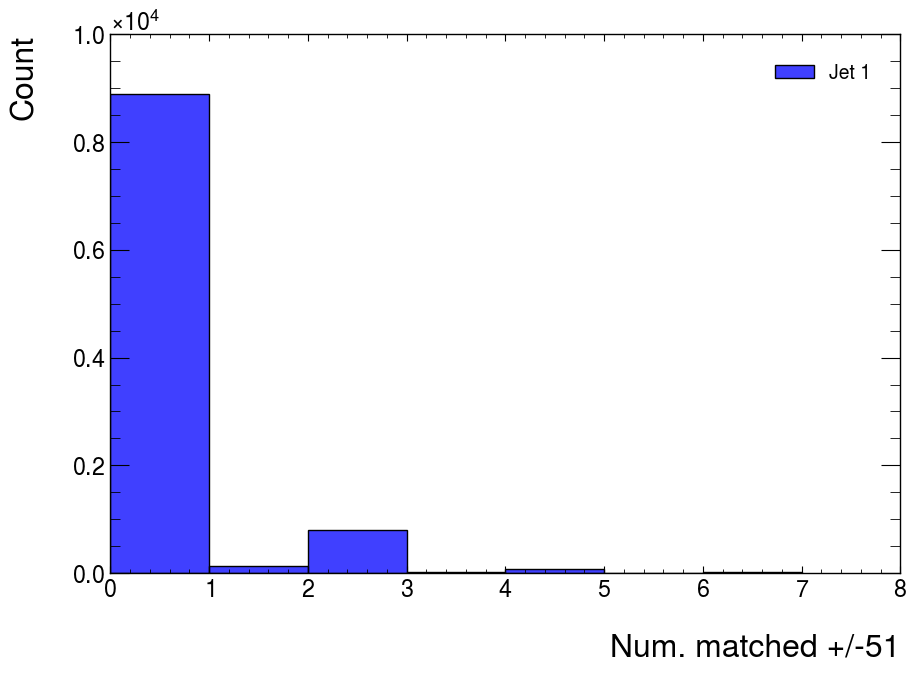

In [153]:
title = 'Total Number of Truth Matched +/-51 to Jet 1: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-51'
atlas_plotter(num_51_1, xlabel = xlabel, legend = 'Jet 1', binwidth = 1, xlim = (0, 8), ylim = (0, 1e4))

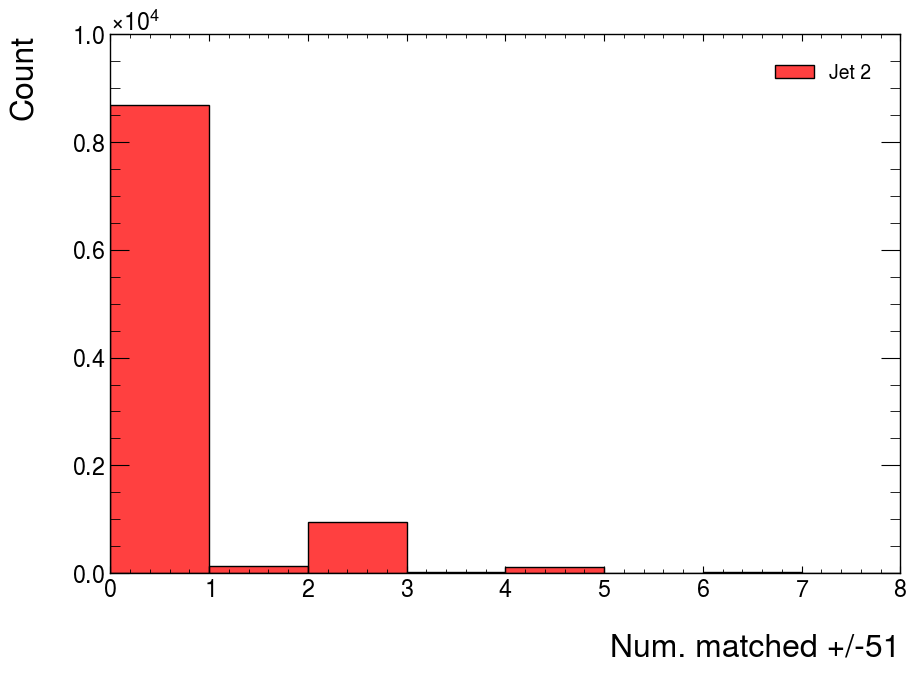

In [152]:
title = 'Total Number of Truth Matched +/-51 to Jet 2: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-51'
atlas_plotter(num_51_2, xlabel, legend = 'Jet 2', binwidth = 1, color = 'red', xlim = (0, 8), ylim = (0, 1e4))

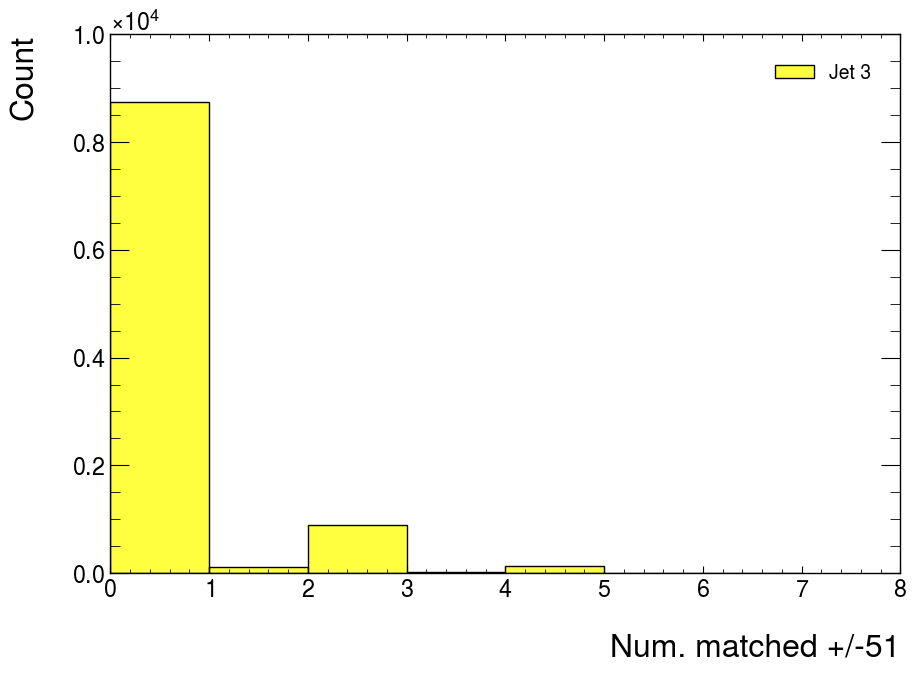

In [151]:
title = 'Total Number of Truth Matched +/-51 to Jet 3: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-51'
atlas_plotter(num_51_3, xlabel, legend = 'Jet 3', binwidth = 1, color = 'yellow', xlim = (0, 8), ylim = (0, 1e4))

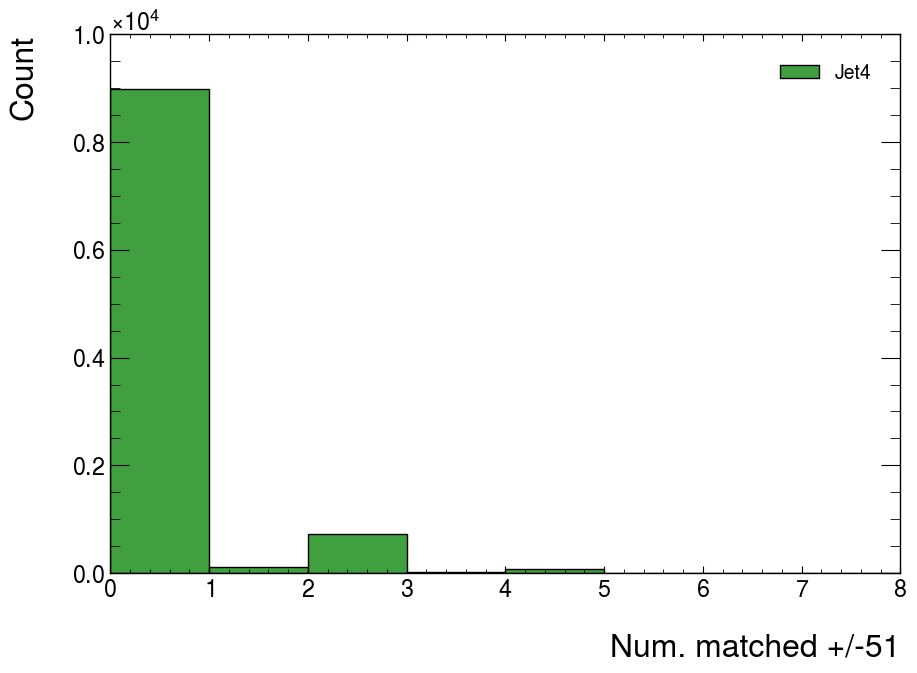

In [147]:
title = 'Total Number of Truth Matched +/-51 to Jet 4: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-51'
atlas_plotter(num_51_4, xlabel, legend = 'Jet4', binwidth = 1, color = 'green', ylim = (0, 1e4))

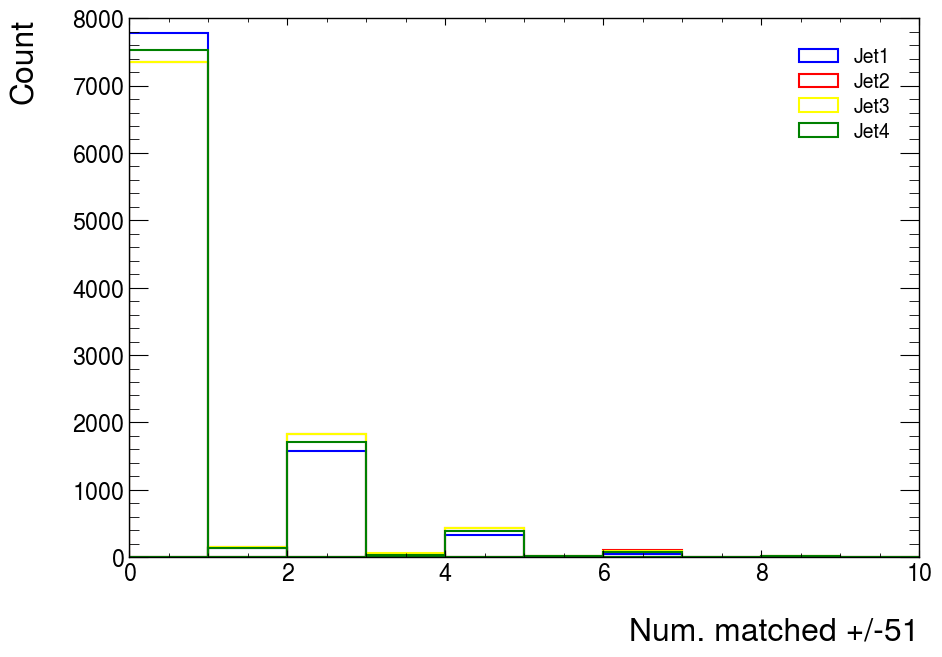

In [25]:
plt.figure(figsize = (10, 7))
plt.xlabel('Num. matched +/-51')
plt.ylim(0, 8e3)
plt.xlim(0, 10)
sns.histplot(num_51_1, binwidth = 1, color = 'blue', label = 'Jet1', fill = False)
sns.histplot(num_51_2, binwidth = 1, color = 'red', label = 'Jet2', fill = False)
sns.histplot(num_51_3, binwidth = 1, color = 'yellow', label = 'Jet3', fill = False)
sns.histplot(num_51_4, binwidth = 1, color = 'green', label = 'Jet4', fill = False)
plt.legend()
plt.show()

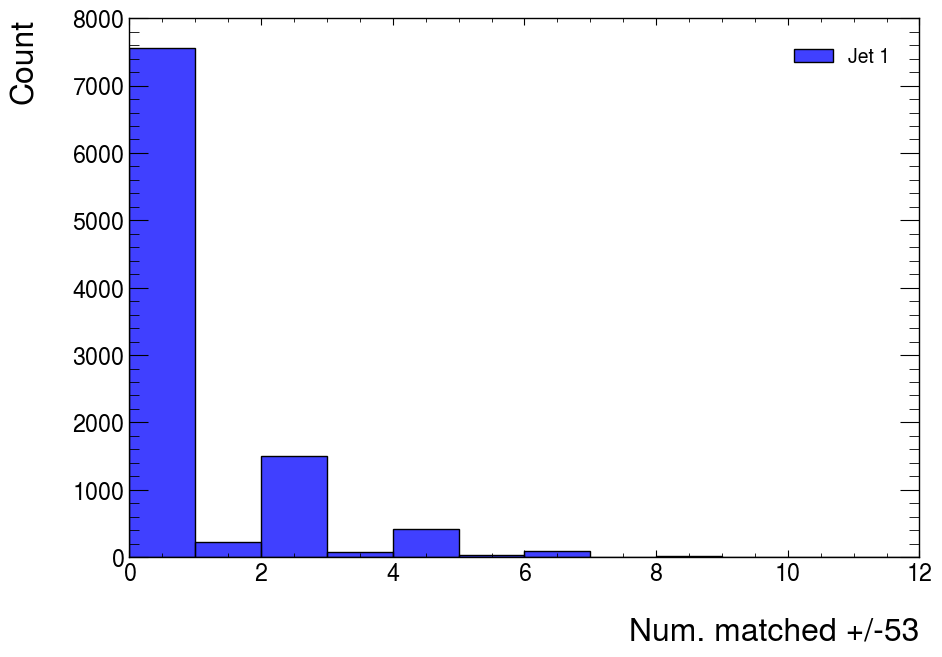

In [160]:
title = 'Total Number of Truth Matched +/-53 to Jet 1: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-53'
atlas_plotter(num_53_1, xlabel = xlabel, legend = 'Jet 1', binwidth = 1, xlim = (0, 12), ylim = (0, 8e3))

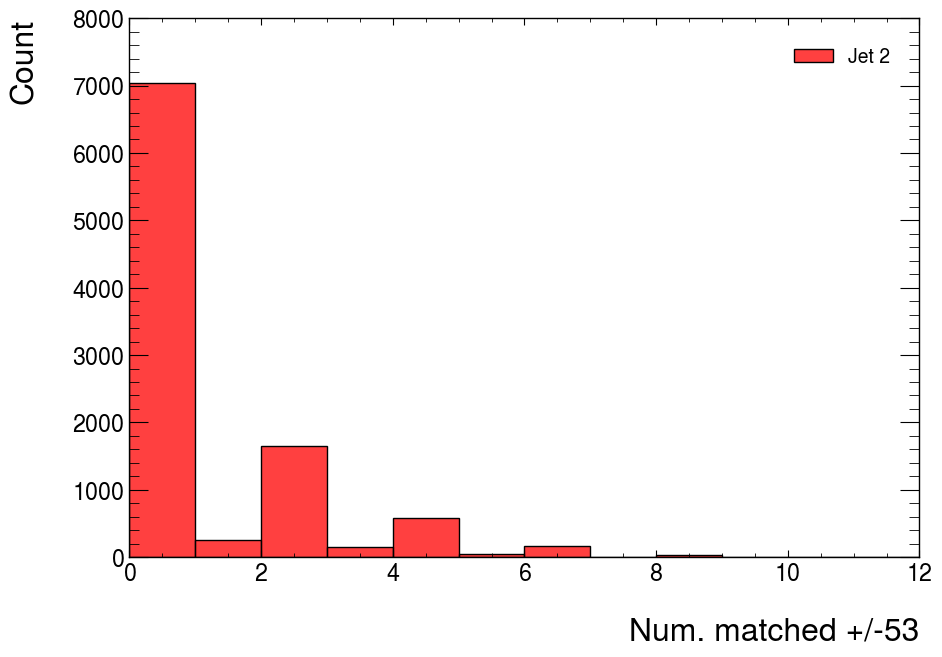

In [159]:
title = 'Total Number of Truth Matched +/-51 to Jet 2: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-53'
atlas_plotter(num_53_2, xlabel, legend = 'Jet 2', binwidth = 1, color = 'red', xlim = (0, 12), ylim = (0, 8e3))

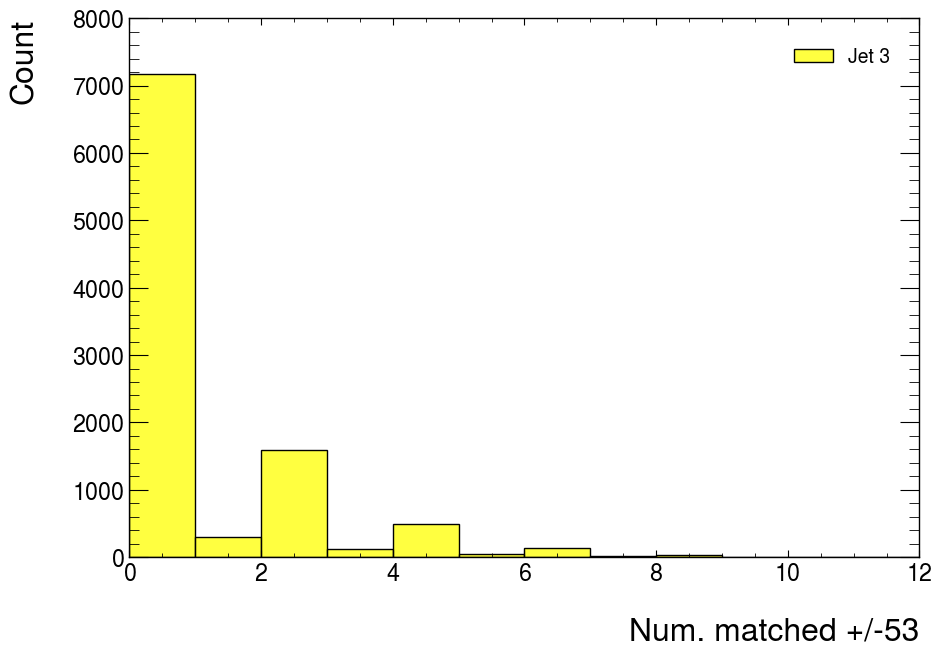

In [158]:
title = 'Total Number of Truth Matched +/-51 to Jet 3: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-53'
atlas_plotter(num_53_3, xlabel, legend = 'Jet 3', binwidth = 1, color = 'yellow', xlim = (0, 12), ylim = (0, 8e3))

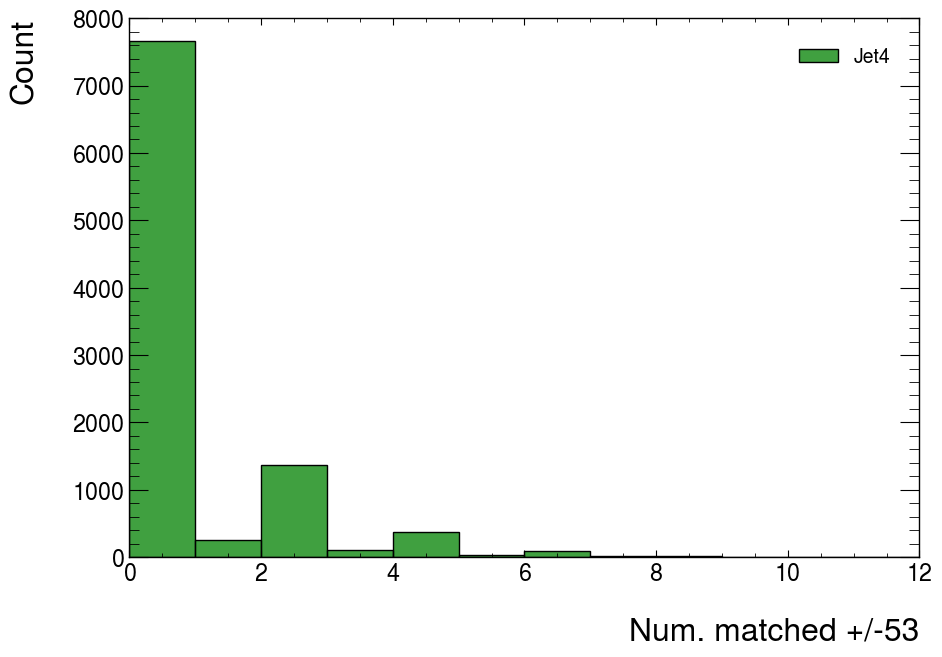

In [157]:
title = 'Total Number of Truth Matched +/-51 to Jet 4: truthBSM vs pflow_reco'
xlabel = 'Num. matched +/-53'
atlas_plotter(num_53_4, xlabel, legend = 'Jet4', binwidth = 1, color = 'green', xlim = (0, 12), ylim = (0, 8e3))

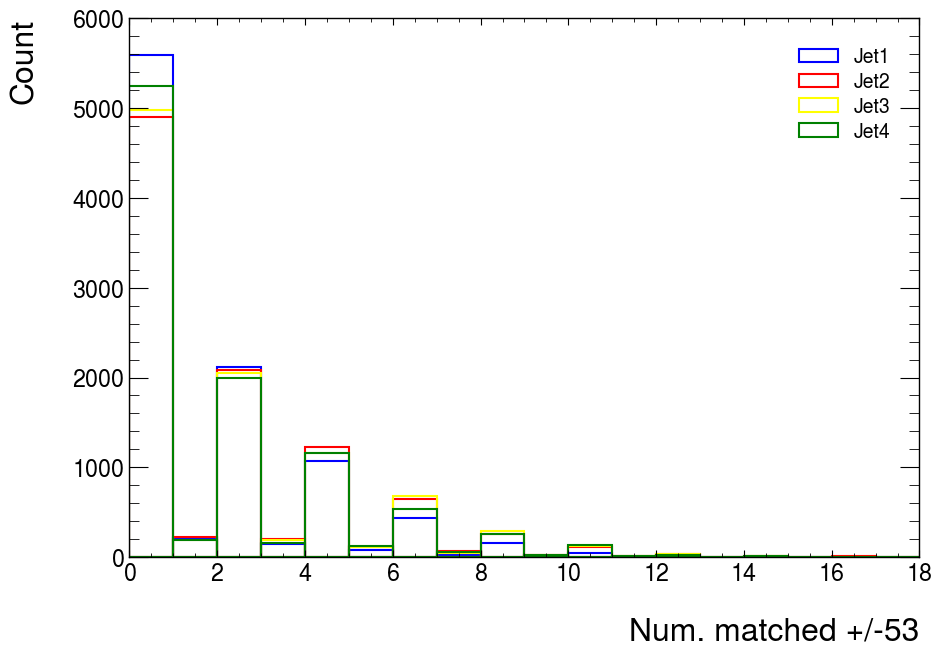

In [26]:
plt.figure(figsize = (10, 7))
plt.xlabel('Num. matched +/-53')
plt.ylim(0, 6e3)
plt.xlim(0, 18)
sns.histplot(num_53_1, binwidth = 1, color = 'blue', label = 'Jet1', fill = False)
sns.histplot(num_53_2, binwidth = 1, color = 'red', label = 'Jet2', fill = False)
sns.histplot(num_53_3, binwidth = 1, color = 'yellow', label = 'Jet3', fill = False)
sns.histplot(num_53_4, binwidth = 1, color = 'green', label = 'Jet4', fill = False)
plt.legend()
plt.show()

In [107]:
match_2to1_1n2_51 = []
match_2to1_1n3_51 = []
match_2to1_1n4_51 = []
match_2to1_2n3_51 = []
match_2to1_2n4_51 = []
match_2to1_3n4_51 = []
particle_list = [51, -51]
for i in range(len(deltaR_lt_pos)):
    temp12 = 0
    temp13 = 0
    temp14 = 0
    temp23 = 0
    temp24 = 0
    temp34 = 0
    jets = []
    particles = []
    try:
        for j in range(len(deltaR_lt_pos[i])):
            jets.append(truthBSM_matched_jets_pdgid[i][j][0])
            particles.append(truthBSM_matched_jets_pdgid[i][j][1])
        count = Counter(jets)
        jet = []
        for k in range(len(particles)):
            if (particles[k] in particle_list):
                jet.append(jets[k])
        count = Counter(jet)
        if len(count.keys()) >= 2:
            if (0 in count.keys()) and (1 in count.keys()):
                temp12=1
            if (0 in count.keys()) and (2 in count.keys()):
                temp13=1
            if (0 in count.keys()) and (3 in count.keys()):
                temp14=1
            if (1 in count.keys()) and (2 in count.keys()):
                temp23=1
            if (1 in count.keys()) and (3 in count.keys()):
                temp24=1
            if (2 in count.keys()) and (3 in count.keys()):
                temp34=1
        match_2to1_1n2_51.append(temp12)
        match_2to1_1n3_51.append(temp13)
        match_2to1_1n4_51.append(temp14)
        match_2to1_2n3_51.append(temp23)
        match_2to1_2n4_51.append(temp24)
        match_2to1_3n4_51.append(temp34)
    except: 
        match_2to1_1n2_51.append(0)
        match_2to1_1n3_51.append(0)
        match_2to1_1n4_51.append(0)
        match_2to1_2n3_51.append(0)
        match_2to1_2n4_51.append(0)
        match_2to1_3n4_51.append(0)

In [108]:
match_2to1_1n2_53 = []
match_2to1_1n3_53 = []
match_2to1_1n4_53 = []
match_2to1_2n3_53 = []
match_2to1_2n4_53 = []
match_2to1_3n4_53 = []
particle_list = [53, -53]
for i in range(len(deltaR_lt_pos)):
    temp12 = 0
    temp13 = 0
    temp14 = 0
    temp23 = 0
    temp24 = 0
    temp34 = 0
    jets = []
    particles = []
    try:
        for j in range(len(deltaR_lt_pos[i])):
            jets.append(truthBSM_matched_jets_pdgid[i][j][0])
            particles.append(truthBSM_matched_jets_pdgid[i][j][1])
        count = Counter(jets)
        jet = []
        for k in range(len(particles)):
            if (particles[k] in particle_list):
                jet.append(jets[k])
        count = Counter(jet)
        if len(count.keys()) >= 2:
            if (0 in count.keys()) and (1 in count.keys()):
                temp12=1
            if (0 in count.keys()) and (2 in count.keys()):
                temp13=1
            if (0 in count.keys()) and (3 in count.keys()):
                temp14=1
            if (1 in count.keys()) and (2 in count.keys()):
                temp23=1
            if (1 in count.keys()) and (3 in count.keys()):
                temp24=1
            if (2 in count.keys()) and (3 in count.keys()):
                temp34=1
        match_2to1_1n2_53.append(temp12)
        match_2to1_1n3_53.append(temp13)
        match_2to1_1n4_53.append(temp14)
        match_2to1_2n3_53.append(temp23)
        match_2to1_2n4_53.append(temp24)
        match_2to1_3n4_53.append(temp34)
    except: 
        match_2to1_1n2_53.append(0)
        match_2to1_1n3_53.append(0)
        match_2to1_1n4_53.append(0)
        match_2to1_2n3_53.append(0)
        match_2to1_2n4_53.append(0)
        match_2to1_3n4_53.append(0)

In [109]:
match_2to1_1n2_51_true = 0
match_2to1_1n3_51_true = 0
match_2to1_1n4_51_true = 0
match_2to1_2n3_51_true = 0
match_2to1_2n4_51_true = 0
match_2to1_3n4_51_true = 0
for i in range(len(match_2to1_1n2_51)):
    if match_2to1_1n2_51[i] == 1:
        match_2to1_1n2_51_true+=1
    if match_2to1_1n3_51[i] == 1:
        match_2to1_1n3_51_true+=1
    if match_2to1_1n4_51[i] == 1:
        match_2to1_1n4_51_true+=1
    if match_2to1_2n3_51[i] == 1:
        match_2to1_2n3_51_true+=1
    if match_2to1_2n4_51[i] == 1:
        match_2to1_2n4_51_true+=1
    if match_2to1_3n4_51[i] == 1:
        match_2to1_3n4_51_true+=1

In [110]:
match_2to1_1n2_53_true = 0
match_2to1_1n3_53_true = 0
match_2to1_1n4_53_true = 0
match_2to1_2n3_53_true = 0
match_2to1_2n4_53_true = 0
match_2to1_3n4_53_true = 0
for i in range(len(match_2to1_1n2_53)):
    if match_2to1_1n2_53[i] == 1:
        match_2to1_1n2_53_true+=1
    if match_2to1_1n3_53[i] == 1:
        match_2to1_1n3_53_true+=1
    if match_2to1_1n4_53[i] == 1:
        match_2to1_1n4_53_true+=1
    if match_2to1_2n3_53[i] == 1:
        match_2to1_2n3_53_true+=1
    if match_2to1_2n4_53[i] == 1:
        match_2to1_2n4_53_true+=1
    if match_2to1_3n4_53[i] == 1:
        match_2to1_3n4_53_true+=1

In [111]:
match_2to1_51 = [] 
for i in range(len(deltaR_lt_pos)):
    temp = 0
    jets = []
    particles = []
    try:
        for j in range(len(deltaR_lt_pos[i])):
            jets.append(truthBSM_matched_jets_pdgid[i][j][0])
            particles.append(truthBSM_matched_jets_pdgid[i][j][1])
        count = Counter(jets)
        jet = []
        for k in range(len(particles)):
            if (particles[k] == 51) or (particles[k] == -51):
                jet.append(jets[k])
        count = Counter(jet)
        if len(count.keys()) >= 2:
            temp = 1
        match_2to1_51.append(temp)
    except: 
        match_2to1_51.append(0)

In [112]:
match_2to1_51_true = 0
for i in range(len(match_2to1_51)):
    if match_2to1_51[i] == 1:
        match_2to1_51_true+=1

In [113]:
percent_2to1_51 = round(match_2to1_51_true/len(match_2to1_51), 4) * 100

In [114]:
match_2to1_53 = [] 
for i in range(len(deltaR_lt_pos)):
    temp = 0
    jets = []
    particles = []
    try:
        for j in range(len(deltaR_lt_pos[i])):
            jets.append(truthBSM_matched_jets_pdgid[i][j][0])
            particles.append(truthBSM_matched_jets_pdgid[i][j][1])
        count = Counter(jets)
        jet = []
        for k in range(len(particles)):
            if (particles[k] == 53) or (particles[k] == -53):
                jet.append(jets[k])
        count = Counter(jet)
        if len(count.keys()) >= 2:
            temp = 1
        match_2to1_53.append(temp)
    except: 
        match_2to1_53.append(0)

In [115]:
match_2to1_53_true = 0
for i in range(len(match_2to1_53)):
    if match_2to1_53[i] == 1:
        match_2to1_53_true+=1

In [116]:
percent_2to1_53 = round(match_2to1_53_true/len(match_2to1_53), 4) * 100

In [117]:
percent_2to1_1n2_51 = round(match_2to1_1n2_51_true/len(match_2to1_1n2_51), 4)*100
percent_2to1_1n3_51 = round(match_2to1_1n3_51_true/len(match_2to1_1n3_51), 4)*100
percent_2to1_1n4_51 = round(match_2to1_1n4_51_true/len(match_2to1_1n4_51), 4)*100
percent_2to1_2n3_51 = round(match_2to1_2n3_51_true/len(match_2to1_2n3_51), 4)*100
percent_2to1_2n4_51 = round(match_2to1_2n4_51_true/len(match_2to1_2n4_51), 4)*100
percent_2to1_3n4_51 = round(match_2to1_3n4_51_true/len(match_2to1_3n4_51), 4)*100

In [118]:
percent_2to1_1n2_53 = round(match_2to1_1n2_53_true/len(match_2to1_1n2_53), 4)*100
percent_2to1_1n3_53 = round(match_2to1_1n3_53_true/len(match_2to1_1n3_53), 4)*100
percent_2to1_1n4_53 = round(match_2to1_1n4_53_true/len(match_2to1_1n4_53), 4)*100
percent_2to1_2n3_53 = round(match_2to1_2n3_53_true/len(match_2to1_2n3_53), 4)*100
percent_2to1_2n4_53 = round(match_2to1_2n4_53_true/len(match_2to1_2n4_53), 4)*100
percent_2to1_3n4_53 = round(match_2to1_3n4_53_true/len(match_2to1_3n4_53), 4)*100

In [119]:
data = [['Jets (A4 51)', 1,          2,                3,                4      ], 
        [1,           0, percent_2to1_1n2_51, percent_2to1_1n3_51, percent_2to1_1n4_51], 
        [2,           0,          0,       percent_2to1_2n3_51, percent_2to1_2n4_51], 
        [3,           0,          0,                0,       percent_2to1_3n4_51], 
        [4,           0,          0,                0,                0      ]]

In [120]:
df = pd.DataFrame(columns = data[0], data=data[1:])
df.style.hide_index()

Jets (A4 51),1,2,3,4
1,0,1.49,1.24,1.08
2,0,0,1.34,1.15
3,0,0,0,1.05
4,0,0,0,0


In [121]:
data = [['Jets (A4 53)', 1,          2,                3,                4      ], 
        [1,           0, percent_2to1_1n2_53, percent_2to1_1n3_53, percent_2to1_1n4_53], 
        [2,           0,          0,       percent_2to1_2n3_53, percent_2to1_2n4_53], 
        [3,           0,          0,                0,       percent_2to1_3n4_53], 
        [4,           0,          0,                0,                0      ]]

In [122]:
df = pd.DataFrame(columns = data[0], data=data[1:])
df.style.hide_index()

Jets (A4 53),1,2,3,4
1,0,7.23,6.73,5.72
2,0,0,6.8,6.31
3,0,0,0,6.03
4,0,0,0,0


In [123]:
match_1to1 = []
for i in deltaR_lt_pos:
    if len(i) != 0:
        match_1to1.append(1)
    else:
        match_1to1.append(0)
        
match_2to1each = []
num = 0
for evt in deltaR_lt_pos:
    temp = 0
    temp2 = []
    try:
        for obj in evt:
            temp2.append(obj[0])
        count = Counter(temp2)
        if len(count.keys()) >= 2:
            temp = 1
        else:
            temp = 0
        match_2to1each.append(temp)
    except:
        match_2to1each.append(-999)

In [124]:
match_1to1_true = 0
match_2to1each_true = 0
for i in range(len(match_1to1)):
    if match_1to1[i] == 1:
        match_1to1_true+=1
    if match_2to1each[i] == 1:
        match_2to1each_true+=1

In [125]:
percent_1to1 = round(match_1to1_true/len(match_1to1)*100, 2)

In [126]:
percent_2to1 = round(match_2to1each_true/len(match_2to1each)*100, 2)

In [127]:
match_1to1_51 = []
for i in range(len(deltaR_lt_pos)):
    temp1 = 0
    try:
        for j in range(len(deltaR_lt_pos[i])):
            if (truthBSM_matched_jets_pdgid[i][j][1] == 51) or (truthBSM_matched_jets_pdgid[i][j][1] == -51):             temp1 = 1
        match_1to1_51.append(temp1)
    except:
        match_1to1_51.append(0)

In [128]:
match_1to1_51_true = 0
for i in range(len(match_1to1_51)):
    if match_1to1_51[i] == 1:
        match_1to1_51_true+=1

In [129]:
match_1to1_53 = []
for i in range(len(deltaR_lt_pos)):
    temp1 = 0
    try:
        for j in range(len(deltaR_lt_pos[i])):
            if (truthBSM_matched_jets_pdgid[i][j][1] == 53) or (truthBSM_matched_jets_pdgid[i][j][1] == -53):             temp1 = 1
        match_1to1_53.append(temp1)
    except:
        match_1to1_53.append(0)

In [130]:
match_1to1_53_true = 0
for i in range(len(match_1to1_53)):
    if match_1to1_53[i] == 1:
        match_1to1_53_true+=1

In [131]:
match_1to1_51_true

3759

In [132]:
percent_1to1_51 = round(match_1to1_51_true/len(match_1to1_51)* 100, 2)

In [133]:
percent_1to1_51

37.77

In [134]:
percent_1to1_53 = round(match_1to1_53_true/len(match_1to1_53)* 100, 2)

In [135]:
df_dict = {'Num. events with at least 1 jet matched to at least 1 particle' : match_1to1_true, 
           'Percentage of 1 jet matched to at least 1 particle' : percent_1to1, 
           'Num. events with at least 1 +/-51 particle matched to at least 1 jet': match_1to1_51_true,
           'Percentage of 1 jet matched to at least 1 +/-51 particle' : percent_1to1_51,
           'Num. events with at least 2 jets matched to at least 1 particle each' : match_2to1each_true, 
           'Percentage of 2 jets matched to at least 1 particle each' : percent_2to1, 
           'Num. events with at least 2 +/-51 particles matched to 2 different jets' : match_2to1_51_true,
           'Percentage of 2 jets matched to at least 1 +/-51 particle each' : percent_2to1_51}

In [136]:
columns = ['Description', 'Num. Events', 'Percentage']
descriptions = ['At least 1 jet matched to at least 1 BSM', 
                'At least 1 jet matched to at least 1 +/-51 particle each', 
                'At least 2 jets matched to at least 1 particle each', 
                'At least 2 jets matched to at least 1 +/-51 particle each']

In [137]:
data = np.array(list(df_dict.values())).reshape((-1, 2))

In [138]:
df = pd.DataFrame(data, columns = columns[1:])

In [139]:
df.insert(loc = 0, column = columns[0], value = descriptions)

In [140]:
df.style.hide_index()

Description,Num. Events,Percentage
At least 1 jet matched to at least 1 BSM,9731,97.78
At least 1 jet matched to at least 1 +/-51 particle each,3759,37.77
At least 2 jets matched to at least 1 particle each,8476,85.17
At least 2 jets matched to at least 1 +/-51 particle each,631,6.34


In [141]:
df_dict = {'Num. events with at least 1 jet matched to at least 1 particle' : match_1to1_true, 
           'Percentage of 1 jet matched to at least 1 particle' : percent_1to1, 
           'Num. events with at least 1 +/-4900101 particle matched to at least 1 jet': match_1to1_53_true,
           'Percentage of 1 jet matched to at least 1 +/-4900101 particle' : percent_1to1_53,
           'Num. events with at least 2 jets matched to at least 1 particle each' : match_2to1each_true, 
           'Percentage of 2 jets matched to at least 1 particle each' : percent_2to1, 
           'Num. events with at least 2 +/-4900101 particles matched to 2 different jets' : match_2to1_53_true,
           'Percentage of 2 jets matched to at least 1 +/-4900101 particle each' : percent_2to1_53}

In [142]:
columns = ['Description', 'Num. Events', 'Percentage']
descriptions = ['At least 1 jet matched to at least 1 BSM', 
                'At least 1 jet matched to at least 1 +/-53 particle each', 
                'At least 2 jets matched to at least 1 particle each', 
                'At least 2 jets matched to at least 1 +/-53 particle each']

In [143]:
data = np.array(list(df_dict.values())).reshape((-1, 2))

In [144]:
df = pd.DataFrame(data, columns = columns[1:])

In [145]:
df.insert(loc = 0, column = columns[0], value = descriptions)

In [146]:
df.style.hide_index()

Description,Num. Events,Percentage
At least 1 jet matched to at least 1 BSM,9731,97.78
At least 1 jet matched to at least 1 +/-53 particle each,7020,70.54
At least 2 jets matched to at least 1 particle each,8476,85.17
At least 2 jets matched to at least 1 +/-53 particle each,2748,27.61


In [115]:
num_51 = []
num_53 = []
particle_list_51 = [51, -51]
particle_list_53 = [53, -53]
for i in truthBSM_pdgIDs:
    temp1 = 0
    temp2 = 0
    temp3 = 0
    try:
        for j in i:
            if (j in particle_list_51):
                temp1+=1
            if (j in particle_list_53):
                temp2+=1
        num_51.append(temp1)
        num_53.append(temp2)
    except:
        continue

No handles with labels found to put in legend.


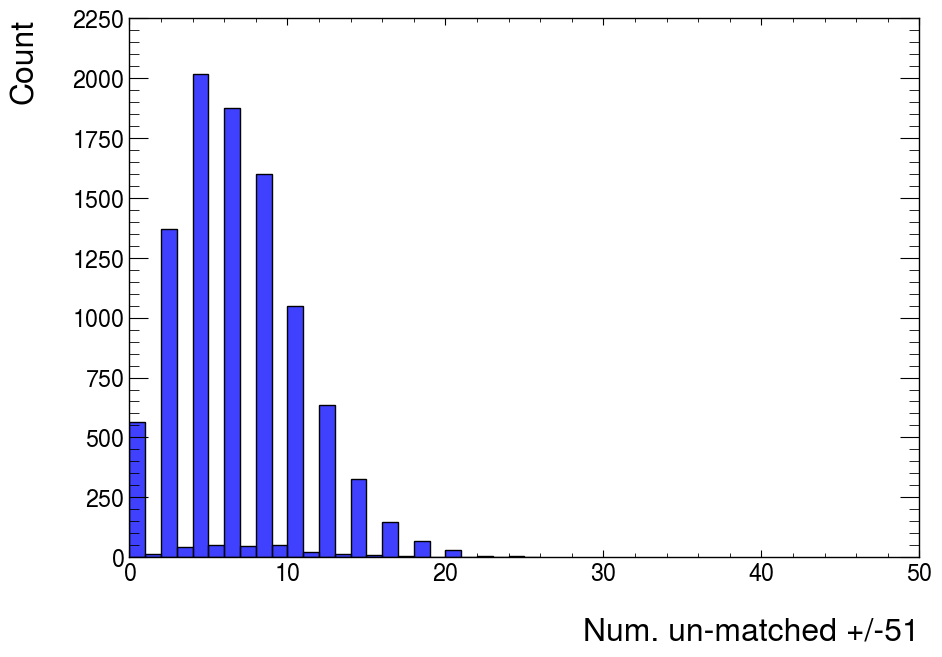

In [116]:
xlabel = 'Num. un-matched +/-51'
atlas_plotter(num_51, xlabel, binwidth = 1, color = 'blue', xlim = (0, 50))

No handles with labels found to put in legend.


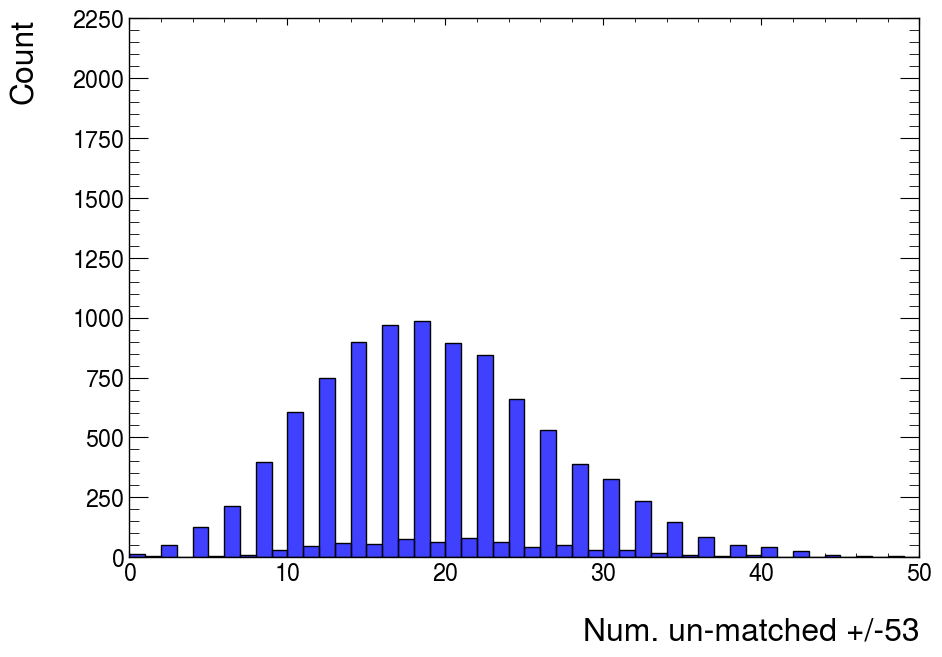

In [117]:
xlabel = 'Num. un-matched +/-53'
atlas_plotter(num_53, xlabel, binwidth = 1, color = 'blue', ylim = (0, 2250), xlim = (0, 50))